In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('star_classification.csv')
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [24]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [25]:
#checking data types
data.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

## Column Descriptions
1. **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
1. **alpha** = Right Ascension angle (at J2000 epoch)
1. **delta** = Declination angle (at J2000 epoch)
1. **u** = Ultraviolet filter in the photometric system
1. **g** = Green filter in the photometric system
1. **r** = Red filter in the photometric system
1. **i** = Near Infrared filter in the photometric system
1. **z** = Infrared filter in the photometric system
1. **run_ID** = Run Number used to identify the specific scan
1. **rerun_ID** = Rerun Number to specify how the image was processed
1. **cam_col** = Camera column to identify the scanline within the run
1. **field_ID** = Field number to identify each field
1. **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
1. **class** = object class (galaxy, star or quasar object)
1. **redshift** = redshift value based on the increase in wavelength
1. **plate** = plate ID, identifies each plate in SDSS
1. **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
1. **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [26]:
# transforming "class" column into numerical values
le = LabelEncoder()
y = data['class'].copy()
y_encoded = le.fit_transform(y)
y_encoded[:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0])

In [27]:
predictor_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']
X = data[predictor_cols].copy()
X.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [28]:
# splitting the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, random_state=111)

In [29]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training/Test Score, k = 1 : 1.0/0.92836
Training/Test Score, k = 3 : 0.9628/0.9372
Training/Test Score, k = 5 : 0.9539333333333333/0.93652
Training/Test Score, k = 7 : 0.94844/0.93496
Training/Test Score, k = 9 : 0.9448/0.93388
Training/Test Score, k = 11 : 0.9423066666666666/0.93212
Training/Test Score, k = 13 : 0.9403466666666667/0.92992
Training/Test Score, k = 15 : 0.9378/0.92836
Training/Test Score, k = 17 : 0.9361866666666666/0.92704
Training/Test Score, k = 19 : 0.93464/0.92672


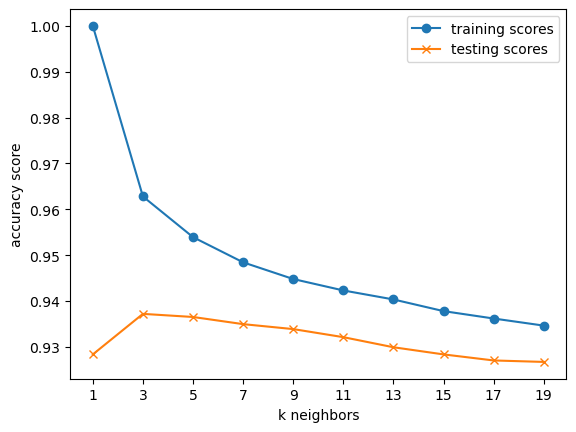

In [30]:
# knn

# loop through k values
# knn
train_scores = []
test_scores = []
for i in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train_encoded)
    train_score = knn_model.score(X_train, y_train_encoded)
    test_score = knn_model.score(X_test, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"Training/Test Score, k = {i} : {train_score}/{test_score}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.xticks(range(1,20,2))
plt.legend()
plt.show()

In [31]:
# decision tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_encoded)
print(f"Training Data Score: {tree_model.score(X_train, y_train_encoded)}")
print(f"Testing Data Score: {tree_model.score(X_test, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.96256


In [32]:
# random forest

# check various estimator and depth values
for i in [32, 64, 128, 256]:
    for j in [3,9, 27, 81, None]:
        rf_model = RandomForestClassifier(random_state=111, max_depth=j, n_estimators=i)
        rf_model.fit(X_train, y_train_encoded)

        print(f"Training ({i} estimators, {j} max depth): {rf_model.score(X_train, y_train_encoded)}")
        print(f"Testing ({i} estimators, {j} max depth): {rf_model.score(X_test, y_test_encoded)}")
        print('...')

Training (32 estimators, 3 max depth): 0.9370133333333334
Testing (32 estimators, 3 max depth): 0.93472
...
Training (32 estimators, 9 max depth): 0.9779066666666667
Testing (32 estimators, 9 max depth): 0.9736
...
Training (32 estimators, 27 max depth): 0.9996266666666667
Testing (32 estimators, 27 max depth): 0.97724
...
Training (32 estimators, 81 max depth): 0.99964
Testing (32 estimators, 81 max depth): 0.97712
...
Training (32 estimators, None max depth): 0.99964
Testing (32 estimators, None max depth): 0.97712
...
Training (64 estimators, 3 max depth): 0.9403466666666667
Testing (64 estimators, 3 max depth): 0.93904
...
Training (64 estimators, 9 max depth): 0.97784
Testing (64 estimators, 9 max depth): 0.97328
...
Training (64 estimators, 27 max depth): 0.9998933333333333
Testing (64 estimators, 27 max depth): 0.97752
...
Training (64 estimators, 81 max depth): 0.9999466666666667
Testing (64 estimators, 81 max depth): 0.97736
...
Training (64 estimators, None max depth): 0.9999

In [33]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# train model 
knn.fit(X_train, y_train_encoded)

# prediction
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.93652
Confusion Matrix:
[[14053   163   515]
 [  388  4335    24]
 [  495     2  5025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14731
           1       0.96      0.91      0.94      4747
           2       0.90      0.91      0.91      5522

    accuracy                           0.94     25000
   macro avg       0.94      0.93      0.93     25000
weighted avg       0.94      0.94      0.94     25000



In [34]:
# RF model
n_estimators_range = [10, 50, 100, 200, 500]

accuracy_results = {}

for n in n_estimators_range:
    print(f"Training with n_estimators={n}...")
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    # Training the model and making predictions
    rf.fit(X_train, y_train_encoded)

    y_pred = rf.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_results[n] = accuracy

    print(f"n_estimators={n}: Accuracy={accuracy}")

print("\nFinal accuracy results:")
for n, accuracy in accuracy_results.items():
    print(f"n_estimators={n}: Accuracy={accuracy}")

Training with n_estimators=10...
n_estimators=10: Accuracy=0.97548
Training with n_estimators=50...
n_estimators=50: Accuracy=0.97716
Training with n_estimators=100...
n_estimators=100: Accuracy=0.97784
Training with n_estimators=200...
n_estimators=200: Accuracy=0.97796
Training with n_estimators=500...
n_estimators=500: Accuracy=0.97784

Final accuracy results:
n_estimators=10: Accuracy=0.97548
n_estimators=50: Accuracy=0.97716
n_estimators=100: Accuracy=0.97784
n_estimators=200: Accuracy=0.97796
n_estimators=500: Accuracy=0.97784
